# **Laptop Price**

## Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score
from scipy.stats import randint

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PROJECT/ML/laptop_prices.csv')
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [ ]:
data.shape

(11768, 11)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [ ]:
data.columns

Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')

In [ ]:
for i in data.columns:
    print(i,data[i].unique(),data[i].nunique())
    print('*'*100)

Brand ['Apple' 'Razer' 'Asus' 'Lenovo' 'Acer' 'Dell' 'Microsoft' 'HP' 'Samsung'
 'MSI'] 10
****************************************************************************************************
Processor ['AMD Ryzen 3' 'AMD Ryzen 7' 'Intel i5' 'Intel i3' 'AMD Ryzen 9'
 'AMD Ryzen 5' 'Intel i9' 'Intel i7'] 8
****************************************************************************************************
RAM (GB) [64  4 32  8 16] 5
****************************************************************************************************
Storage ['512GB SSD' '1TB SSD' '2TB SSD' '256GB SSD' '1TB HDD'] 5
****************************************************************************************************
GPU ['Nvidia GTX 1650' 'Nvidia RTX 3080' 'Nvidia RTX 3060'
 'AMD Radeon RX 6600' 'Nvidia RTX 2060' 'AMD Radeon RX 6800' 'Integrated'] 7
****************************************************************************************************
Screen Size (inch) [17.3 14.  13.3 16.  15.6] 5
***********

## Outliers

In [ ]:
df=data[(data['Weight (kg)'] > 3.5) & (data['Weight (kg)'] < 1.2)]
df

,Processor,RAM (GB),GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($)


In [ ]:
df=data[(data['Battery Life (hours)'] > 11.5) & (data['Battery Life (hours)'] < 5.5)]
df

,Processor,RAM (GB),GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($)


## Visualization

In [ ]:
c = ['violet', 'plum', 'thistle', 'lavender','lightcoral','silver']  # Your list of colors

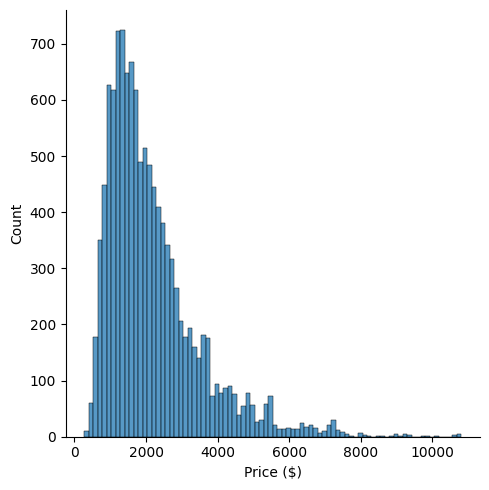

In [ ]:
import seaborn as sns
sns.displot(data['Price ($)'])

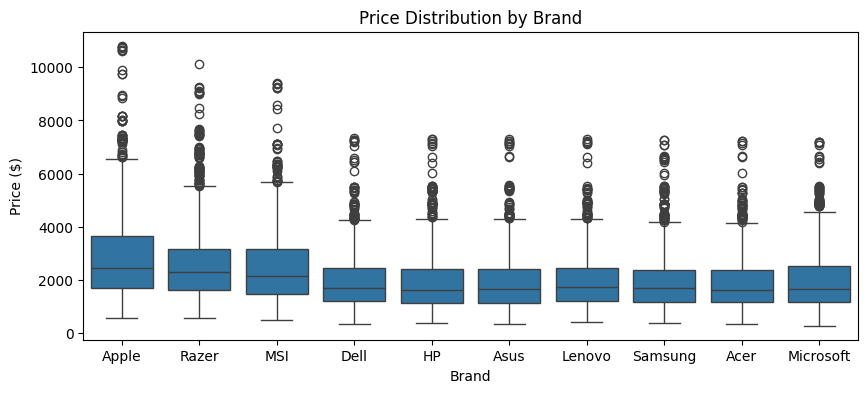

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Brand', y='Price ($)', data=data)
plt.title('Price Distribution by Brand')
plt.show()

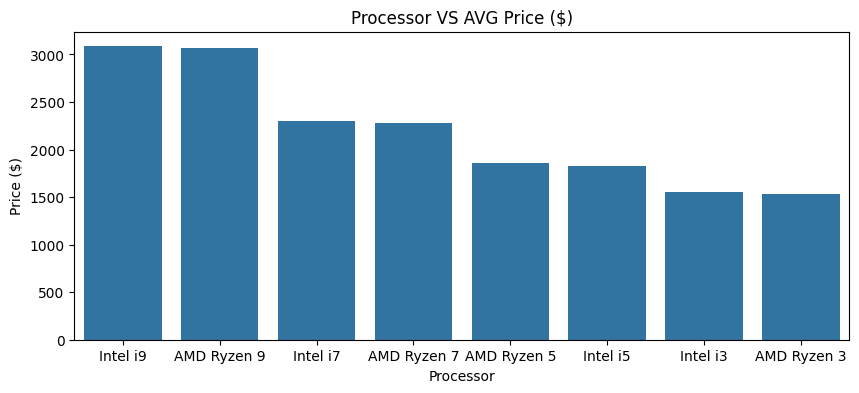

In [ ]:
d= pd.DataFrame(data.groupby(['Processor'])['Price ($)'].mean())
d.sort_values(by='Price ($)', ascending=False,inplace=True)

plt.figure(figsize=(10, 4))

sns.barplot(x=d.index, y=d['Price ($)'], order=d.index)

plt.title("Processor VS AVG Price ($)")
plt.show()

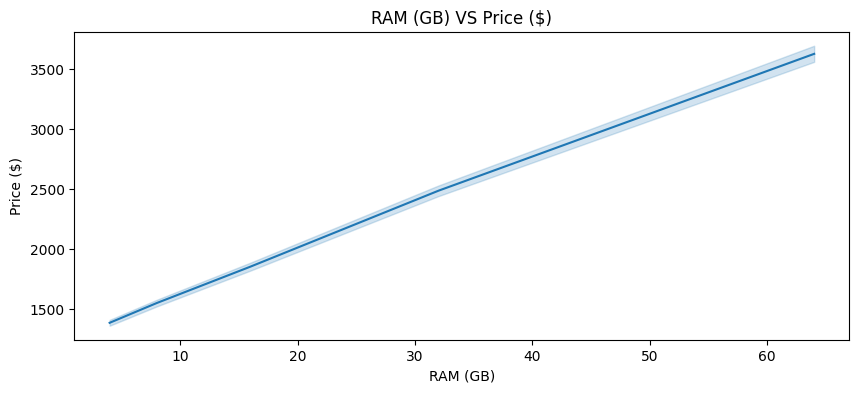

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='RAM (GB)', y='Price ($)', data=data)

plt.title("RAM (GB) VS Price ($)")
plt.show()

## Transformation

In [ ]:
Brand_ohe = OneHotEncoder(sparse_output=False)
Brand_ohe.fit(data[['Brand']])
Brand = Brand_ohe.transform(data[['Brand']])
Br = pd.DataFrame(Brand,columns=Brand_ohe.get_feature_names_out())

In [ ]:
import re
import pandas as pd

class DataTransformer:
    def __init__(self, data):
        self.data = data
        self.processor_mapping = {
            'AMD Ryzen 3': 1, 'Intel i3': 2, 'Intel i5': 3, 'AMD Ryzen 5': 4,
            'AMD Ryzen 7': 5, 'Intel i7': 6, 'AMD Ryzen 9': 7, 'Intel i9': 8
        }
        self.inverse_processor_mapping = {v: k for k, v in self.processor_mapping.items()}

        self.gpu_mapping = {
            "Integrated": 1, "Nvidia GTX 1650": 2, "Nvidia RTX 2060": 3,
            "AMD Radeon RX 6600": 4, "Nvidia RTX 3060": 5,
            "AMD Radeon RX 6800": 6, "Nvidia RTX 3080": 7
        }
        self.inverse_gpu_mapping = {v: k for k, v in self.gpu_mapping.items()}

    def transform(self):
        """Encodes the 'Processor', 'Storage', 'GPU', and 'Resolution' columns in the given DataFrame."""
        if 'Processor' in self.data.columns:
            self.data['Processor'] = self.data['Processor'].map(self.processor_mapping)

        if 'Storage' in self.data.columns:
            self.data[['Storage_Size', 'SSD', 'HDD']] = pd.DataFrame(
                self.convert_storage_to_ml_format(self.data['Storage'].tolist()), index=self.data.index
            )
            self.data.drop(columns=['Storage'], inplace=True)

        if 'GPU' in self.data.columns:
            self.data['GPU'] = self.data['GPU'].map(self.gpu_mapping)

        if 'Resolution' in self.data.columns:
            self.data['Resolution'] = self.data['Resolution'].apply(self.convert_resolution)

        return self.data

    def inverse_transform(self):
        """Decodes numerical values back to their original labels for 'Processor' and 'GPU', and reconstructs 'Storage'."""
        if 'Processor' in self.data.columns:
            self.data['Processor'] = self.data['Processor'].map(self.inverse_processor_mapping)

        if 'GPU' in self.data.columns:
            self.data['GPU'] = self.data['GPU'].map(self.inverse_gpu_mapping)

        if {'Storage_Size', 'SSD', 'HDD'}.issubset(self.data.columns):
            self.data['Storage'] = self.data.apply(lambda row: self.reconstruct_storage(row), axis=1)
            self.data.drop(columns=['Storage_Size', 'SSD', 'HDD'], inplace=True)

        return self.data

    def convert_storage_to_ml_format(self, storage_list):
        """Converts storage descriptions to a machine learning-compatible format."""
        data = []

        for item in storage_list:
            match = re.match(r"(\d+)(TB|GB)\s+(SSD|HDD)", item)
            if match:
                size, unit, storage_type = match.groups()
                size = int(size)

                if unit == "TB":
                    size *= 1024

                ssd = 1 if storage_type == "SSD" else 0
                hdd = 1 if storage_type == "HDD" else 0

                data.append([size, ssd, hdd])

        return data

    def reconstruct_storage(self, row):
        """Reconstructs the storage description from numerical format."""
        size = row['Storage_Size']
        storage_type = 'SSD' if row['SSD'] == 1 else 'HDD'
        unit = 'TB' if size >= 1024 else 'GB'
        size = size // 1024 if unit == 'TB' else size
        return f"{size}{unit} {storage_type}"

    def convert_resolution(self, resolution):
        """Converts resolution from string format '1920x1080' to integer (total pixels)."""
        a, b = map(int, resolution.split('x'))
        return a * b


In [ ]:
DataTransforme = DataTransformer(data)

data = DataTransforme.transform()
data

,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Size,SSD,HDD
0,Apple,1,64,2,17.3,3686400,8.9,1.42,FreeDOS,3997.07,512,1,0
1,Razer,5,4,7,14.0,1049088,9.4,2.57,Linux,1355.78,1024,1,0
2,Asus,3,32,5,13.3,8294400,8.5,1.74,FreeDOS,2673.07,2048,1,0
3,Lenovo,3,4,7,13.3,1049088,10.5,3.10,Windows,751.17,256,1,0
4,Razer,2,4,4,16.0,8294400,5.7,3.38,Linux,2059.83,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,2,4,3,17.3,1049088,11.5,1.58,macOS,704.82,2048,1,0
11764,Asus,2,4,6,16.0,1049088,9.5,2.14,Linux,775.59,2048,1,0
11765,Razer,7,4,4,15.6,3686400,8.2,2.05,Linux,2789.46,2048,1,0
11766,Samsung,5,16,1,13.3,2073600,7.5,1.48,macOS,1067.13,512,1,0


In [ ]:
data['Resolution'].unique()

array([3686400, 1049088, 8294400, 2073600])

In [ ]:
Operating_System_ohe = OneHotEncoder(sparse_output=False)
Operating_System_ohe.fit(data[['Operating System']])
Operating_System = Operating_System_ohe.transform(data[['Operating System']])
os = pd.DataFrame(Operating_System,columns=Operating_System_ohe.get_feature_names_out())

In [ ]:
data.drop(columns=['Brand','Operating System'],inplace=True)

In [ ]:
d = pd.concat([data,Br,os],axis = 1)
d

,Processor,RAM (GB),GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($),Storage_Size,SSD,...,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Razer,Brand_Samsung,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,1,64,2,17.3,3686400,8.9,1.42,3997.07,512,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5,4,7,14.0,1049088,9.4,2.57,1355.78,1024,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,32,5,13.3,8294400,8.5,1.74,2673.07,2048,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,4,7,13.3,1049088,10.5,3.10,751.17,256,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,4,4,16.0,8294400,5.7,3.38,2059.83,256,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,2,4,3,17.3,1049088,11.5,1.58,704.82,2048,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11764,2,4,6,16.0,1049088,9.5,2.14,775.59,2048,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11765,7,4,4,15.6,3686400,8.2,2.05,2789.46,2048,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11766,5,16,1,13.3,2073600,7.5,1.48,1067.13,512,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## correlation

In [ ]:
correlation = d.corr()
correlation

,Processor,RAM (GB),GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($),Storage_Size,SSD,...,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Razer,Brand_Samsung,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
Processor,1.000000,0.013641,0.018156,-0.006955,-0.005307,0.008986,0.007465,0.420844,0.009915,0.004948,...,0.002825,0.006994,-0.013105,-0.004924,0.017394,0.005641,-0.006421,0.008113,-0.005905,0.004237
RAM (GB),0.013641,1.000000,0.003364,0.007915,-0.012860,0.012470,-0.001716,0.616221,-0.033056,-0.003473,...,-0.001778,0.012959,-0.009725,0.012946,-0.014600,-0.006802,-0.001059,-0.008513,0.008148,0.001422
GPU,0.018156,0.003364,1.000000,-0.014656,0.011894,-0.005400,-0.004860,0.128197,0.006007,-0.001612,...,-0.000045,0.012092,0.008423,-0.004661,-0.017913,0.015045,-0.010849,0.009838,-0.002571,0.003604
Screen Size (inch),-0.006955,0.007915,-0.014656,1.000000,-0.000865,0.008348,-0.015508,0.069829,0.002538,-0.005080,...,0.000806,0.006268,0.018371,0.002711,-0.011432,-0.012070,0.017649,-0.005372,0.005967,-0.018325
Resolution,-0.005307,-0.012860,0.011894,-0.000865,1.000000,-0.004807,0.000218,0.415807,0.001077,-0.005505,...,-0.013864,-0.006646,0.011639,0.003560,0.001083,-0.001627,0.000797,-0.001366,-0.001078,0.001653
Battery Life (hours),0.008986,0.012470,-0.005400,0.008348,-0.004807,1.000000,-0.001774,0.009778,-0.009171,-0.008882,...,0.011338,0.012750,-0.032063,-0.008229,-0.000920,0.000285,-0.007723,0.004419,0.002237,0.001074
Weight (kg),0.007465,-0.001716,-0.004860,-0.015508,0.000218,-0.001774,1.000000,0.002431,-0.002477,-0.005459,...,0.002998,0.020698,0.007377,-0.000196,0.004562,-0.006215,-0.001910,0.002411,-0.000337,-0.000164
Price ($),0.420844,0.616221,0.128197,0.069829,0.415807,0.009778,0.002431,1.000000,-0.016259,0.102685,...,-0.062941,-0.051136,0.085067,-0.052700,0.126323,-0.056474,0.002803,-0.002119,-0.001124,0.000441
Storage_Size,0.009915,-0.033056,0.006007,0.002538,0.001077,-0.009171,-0.002477,-0.016259,1.000000,-0.036986,...,-0.001846,0.005174,0.003823,0.002822,-0.012430,-0.017442,0.004322,-0.002010,0.002892,-0.005227
SSD,0.004948,-0.003473,-0.001612,-0.005080,-0.005505,-0.008882,-0.005459,0.102685,-0.036986,1.000000,...,-0.000492,-0.001461,-0.013655,0.007037,0.009520,0.008973,0.013074,-0.016179,-0.009956,0.013106


In [ ]:
corr = correlation['Price ($)']
corr

,Price ($)
Processor,0.420844
RAM (GB),0.616221
GPU,0.128197
Screen Size (inch),0.069829
Resolution,0.415807
Battery Life (hours),0.009778
Weight (kg),0.002431
Price ($),1.000000
Storage_Size,-0.016259
SSD,0.102685


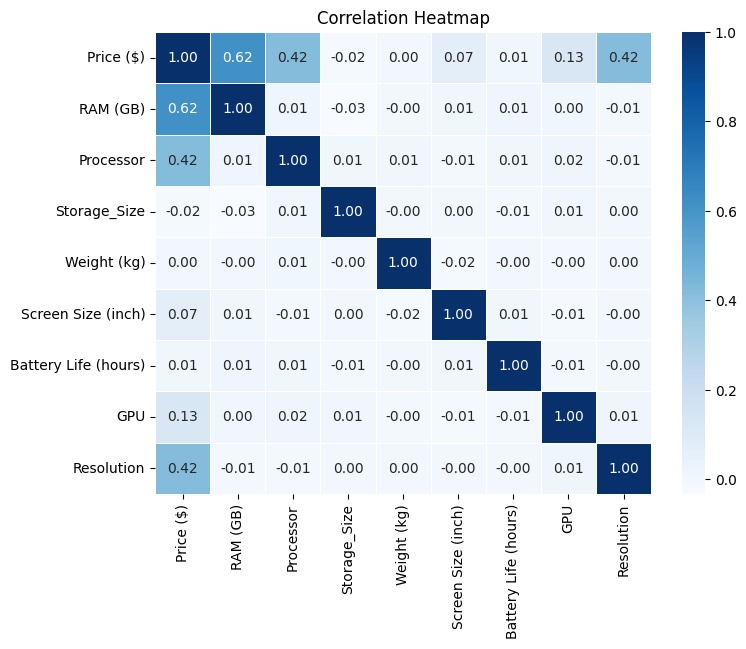

In [ ]:
selected_columns = ['Price ($)', 'RAM (GB)','Processor', 'Storage_Size', 'Weight (kg)','Screen Size (inch)', 'Battery Life (hours)','GPU','Resolution']
correlation = d[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Blues',fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## train test split

In [ ]:
x = d.drop(columns=['Price ($)'])
y = d['Price ($)']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
scaler.fit(xtest)
xtest = scaler.transform(xtest)

# **MODEL BUILDING**

## **KNN**

In [ ]:
clsa = KNeighborsRegressor()
clsa.fit(xtrain,ytrain)
ypred = clsa.predict(xtest)
ypred

array([3900.296, 1495.11 , 3653.37 , ..., 2388.434, 2424.656,  971.074])

In [ ]:
print('mean_absolute_error: ',mean_absolute_error(ytest,ypred))
print("r2 score : ",r2_score(ytest,ypred))

mean_absolute_error:  461.9372472387426
r2 score :  0.7333215651994855


### GridSearchCSV

In [ ]:
cls1 = KNeighborsRegressor()

In [ ]:
help(cls1)

Help on KNeighborsRegressor in module sklearn.neighbors._regression object:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 

In [ ]:
params = {'n_neighbors':[3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan','minkowski'],'p':[1,2]}
clf = GridSearchCV(cls1,params,cv=10,scoring='r2')
clf.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [ ]:
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [ ]:
cls = KNeighborsRegressor(metric='manhattan',n_neighbors= 5, p=1, weights='distance')
cls.fit(xtrain,ytrain)
ypred_knn = cls.predict(xtest)
ypred_knn

array([4082.06379226, 1586.54751107, 3256.07965838, ..., 2543.53528314,
       2875.45507311, 1059.09718149])

In [ ]:
print('mean_absolute_error: ',mean_absolute_error(ytest,ypred))
print("r2 score : ",r2_score(ytest,ypred_knn))

mean_absolute_error:  367.6750525979181
r2 score :  0.753821996419084


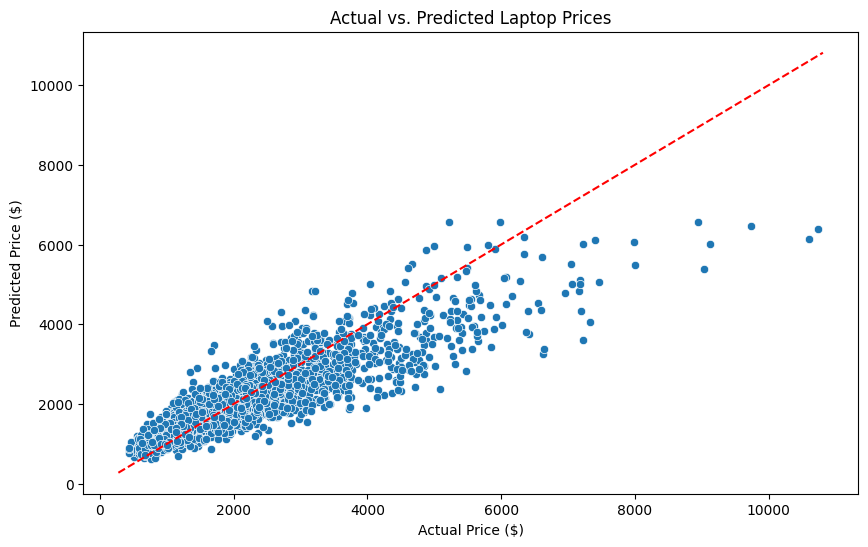

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ytest, y=ypred_knn)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

## **DecisionTree**

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression
sk= SelectKBest(score_func=f_regression,k='all')
sk.fit(x,y)
sk.scores_

array([2.53238204e+03, 7.20312253e+03, 1.96598782e+02, 5.76528562e+01,
       2.45953535e+03, 1.12495618e+00, 6.95490802e-02, 5.43835773e+01,
       4.53299064e+02, 4.91617074e+01, 3.35407058e+01, 4.67967624e+01,
       3.08475507e+01, 8.57648662e+01, 3.27686333e+01, 1.90799207e+02,
       3.76449999e+01, 3.11113408e+00, 1.25385668e+02, 1.25385668e+02,
       9.24299493e-02, 5.28380299e-02, 1.48668669e-02, 2.28868076e-03])

In [ ]:
cor_data=pd.DataFrame({'col_name':x.columns,'score':sk.scores_})
cor_data

,col_name,score
0,Processor,2532.382040
1,RAM (GB),7203.122528
2,GPU,196.598782
3,Screen Size (inch),57.652856
4,Resolution,2459.535352
5,Battery Life (hours),1.124956
6,Weight (kg),0.069549
7,Brand_Acer,54.383577
8,Brand_Apple,453.299064
9,Brand_Asus,49.161707


In [ ]:
dta = DecisionTreeRegressor()
dta.fit(xtrain,ytrain)
ypred_dt = dta.predict(xtest)
ypred_dt

array([4926.48, 1369.66, 4820.1 , ..., 2650.08, 4546.57,  990.06])

In [ ]:
print('mean_absolute_error: ',mean_absolute_error(ytest,ypred))
print("r2 score : ",r2_score(ytest,ypred_dt))

mean_absolute_error:  367.6750525979181
r2 score :  0.9738024769135831


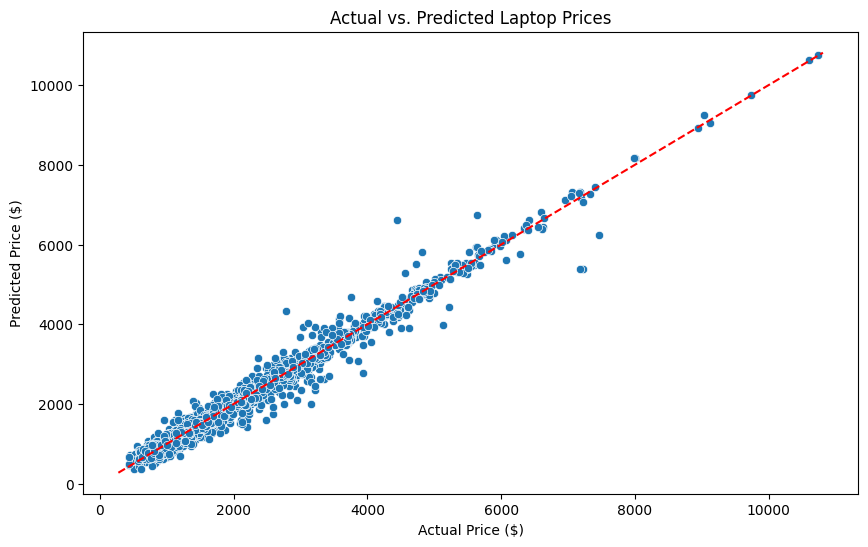

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ytest, y=ypred_dt)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

## **Linear regression**

In [ ]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
ypred

array([3719.12649558, 1653.40591329, 3936.47743814, ..., 2596.57008587,
       3738.98456197,  543.462287  ])

In [ ]:
print('mean_absolute_error: ',mean_absolute_error(ytest,ypred))
print("r2 score : ",r2_score(ytest,ypred))

mean_absolute_error:  366.327744370781
r2 score :  0.8413143359071811


In [ ]:
print("slope",lr.coef_)
print("y intercept",lr.intercept_)

slope [ 1.66975559e+03  2.25728919e+03  4.49829831e+02  2.46385579e+02
  1.45529071e+03  1.92765272e+01 -2.67377061e+01  2.25653726e+01
  1.83222340e+02 -1.83222340e+02 -2.36535969e+02  7.34435870e+02
 -2.38039872e+02 -2.46460466e+02 -2.24181995e+02 -2.39292015e+02
  3.69507621e+02 -2.38807776e+02  5.36193911e+02 -2.16819308e+02
 -1.11695015e+00  2.97927527e+00  2.84256661e+00 -4.70489174e+00]
y intercept -443.4652645772253


In [ ]:
print('trainscore : ',lr.score(xtrain,ytrain))
print('testscore : ',lr.score(xtest,ytest))

trainscore :  0.838173171139367
testscore :  0.8413143359071811


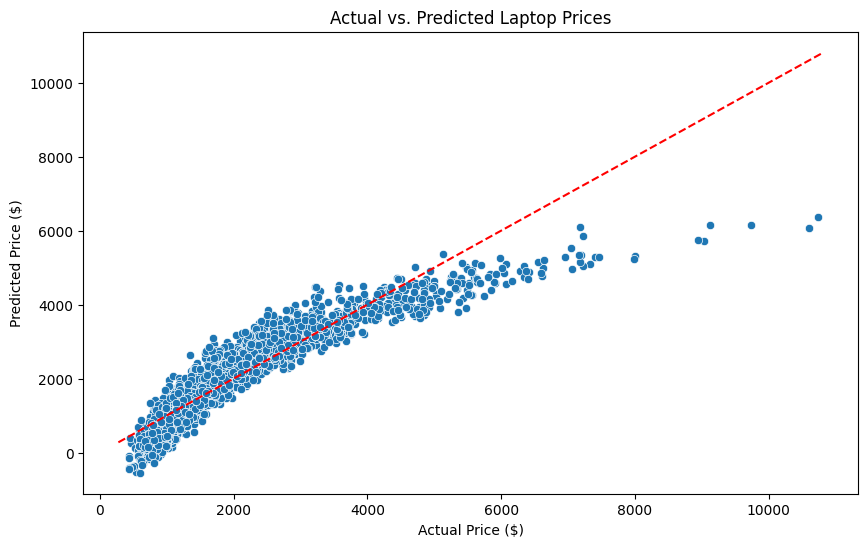

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ytest, y=ypred)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

### polynomial

In [ ]:
poly=PolynomialFeatures(degree=3)
xpolytr=poly.fit_transform(xtrain)
xpolytr

array([[1.        , 0.28571429, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.14285714, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.06666667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.28571429, 0.46666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.28571429, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.14285714, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
xpolyts=poly.fit_transform(xtest)
xpolyts

array([[1.        , 0.85714286, 0.46666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.85714286, 0.46666667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.71428571, 0.46666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.85714286, 0.46666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.42857143, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
lin=LinearRegression()
lin.fit(xpolytr,ytrain)

LinearRegression()

In [ ]:
ypoly=lin.predict(xpolyts)
ypoly

array([4144.97685753, 1162.46250444, 4606.80952102, ..., 3062.48810466,
       4257.80692966,  992.16211236])

In [ ]:
print('simple linear regression: ',r2_score(ytest,ypred))
print('polynomial regression: ',r2_score(ytest,ypoly))

simple linear regression:  0.864258071772888
polynomial regression:  0.9696268342933274


In [ ]:
print('trainscore : ',lin.score(xpolytr,ytrain))
print('testscore : ',lin.score(xpolyts,ytest))

trainscore :  0.9783523522068955
testscore :  0.9696268342933274


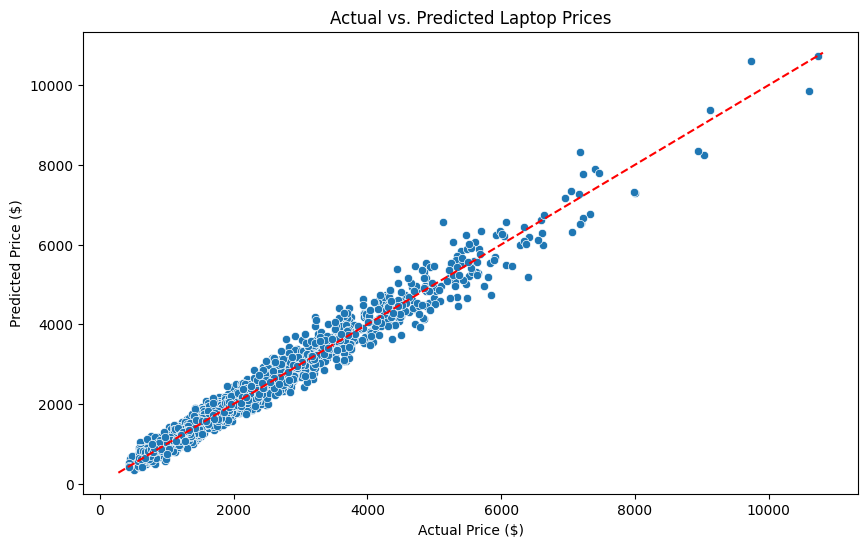

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ytest, y=ypoly)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

## **SVM**

In [ ]:
svr = SVR()
svr.fit(xtrain,ytrain)

SVR()

In [ ]:
ypred = svr.predict(xtest)
ypred

array([2005.60440791, 1770.85401723, 2028.49493163, ..., 1891.12981335,
       2019.84193589, 1672.86710075])

In [ ]:
print('mean_absolute_error: ',mean_absolute_error(ytest,ypred))
print("r2 score : ",r2_score(ytest,ypred))

mean_absolute_error:  827.8291727854354
r2 score :  0.09297316069939987


### RandomizedSearchCV

In [ ]:
svra = SVR()

In [ ]:
help(svra)

Help on SVR in module sklearn.svm._classes object:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precompu

In [ ]:
params = {'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.2, 0.5],'kernel': ['linear', 'rbf', 'poly'],'gamma': ['scale', 'auto', 0.1, 0.01],'degree': [2, 3, 4]}
rs = RandomizedSearchCV(svra, params, n_iter=50, cv=6, scoring='r2', random_state=42)
rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=6, estimator=SVR(), n_iter=50,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [2, 3, 4],
                                        'epsilon': [0.01, 0.1, 0.2, 0.5],
                                        'gamma': ['scale', 'auto', 0.1, 0.01],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='r2')

In [ ]:
rs.best_params_

{'kernel': 'poly', 'gamma': 'scale', 'epsilon': 0.5, 'degree': 2, 'C': 100}

In [ ]:
svr = SVR(kernel = 'poly',gamma = 'scale',epsilon = 0.5, degree = 2, C = 100)
svr.fit(xtrain,ytrain)

SVR(C=100, degree=2, epsilon=0.5, kernel='poly')

In [ ]:
ypred_svm = svr.predict(xtest)
ypred_svm

array([3819.7384469 , 1488.43908325, 4184.6063376 , ..., 2667.66465832,
       4027.45020155,  940.43482016])

In [ ]:
print('mean_absolute_error: ',mean_absolute_error(ytest,ypred))
print("r2 score : ",r2_score(ytest,ypred_svm))

mean_absolute_error:  367.6750525979181
r2 score :  0.9418548680434828


## **Random Forest**

In [ ]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
ypred_rf

array([4834.6662, 1410.7066, 4771.0317, ..., 2639.1521, 4503.5649,
        999.3552])

In [ ]:
print('mean_absolute_error: ',mean_absolute_error(ytest,ypred_rf))
print("r2 score : ",r2_score(ytest,ypred_rf))

mean_absolute_error:  109.66101372132538
r2 score :  0.9862033034806593


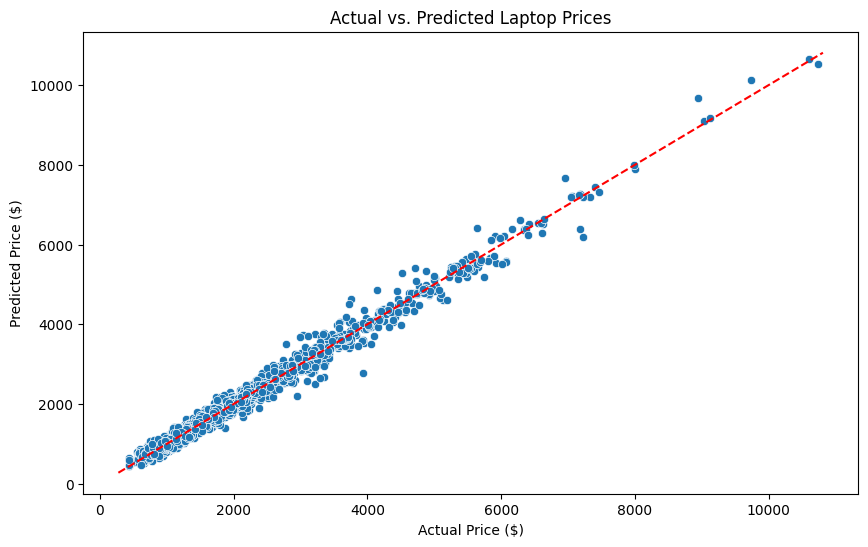

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ytest, y=ypred_rf)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

## **Ada Boost**

In [ ]:
adbst = AdaBoostRegressor(n_estimators=10,estimator=DecisionTreeRegressor(max_depth=6))
adbst.fit(xtrain, ytrain)
ypred_ad = adbst.predict(xtest)
ypred_ad

array([4761.47412752, 1816.58661626, 4761.47412752, ..., 2809.28125954,
       3662.07993151,  969.75373178])

In [ ]:
print('mean_absolute_error: ',mean_absolute_error(ytest,ypred))
print("r2 score : ",r2_score(ytest,ypred_ad))

mean_absolute_error:  367.6750525979181
r2 score :  0.9015403536985047


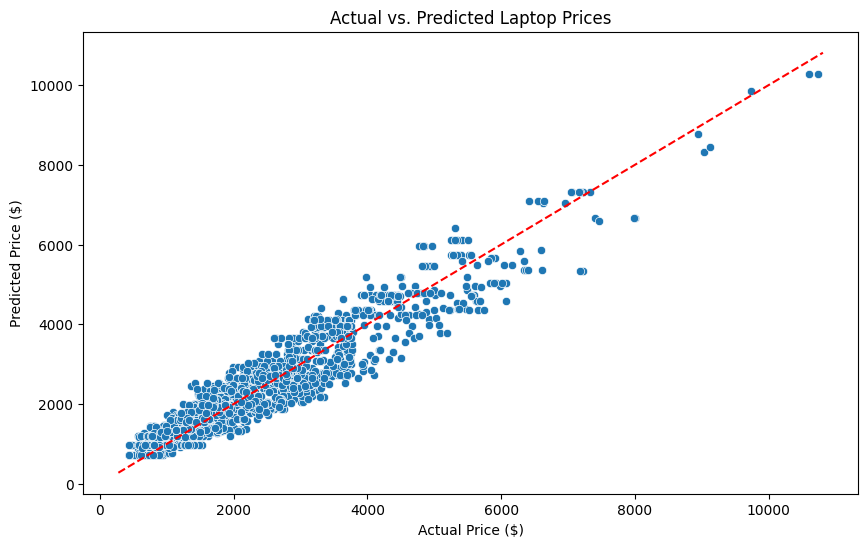

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ytest, y=ypred_ad)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

## **ACCURACY**

In [ ]:
accuracy = pd.DataFrame({'MODEL': ["KNN", "Decition Tree", "Linear Regression", "SVM", "Random Forest", "Ada Boost"],'r2_score': [r2_score(ytest, ypred_knn), r2_score(ytest, ypred_dt), r2_score(ytest, ypoly),r2_score(ytest, ypred_svm), r2_score(ytest, ypred_rf), r2_score(ytest, ypred_ad)]},index=[1,2,3,4,5,6])
accuracy

,MODEL,r2_score
1,KNN,0.753822
2,Decition Tree,0.973802
3,Linear Regression,0.969627
4,SVM,0.941855
5,Random Forest,0.985987
6,Ada Boost,0.901540


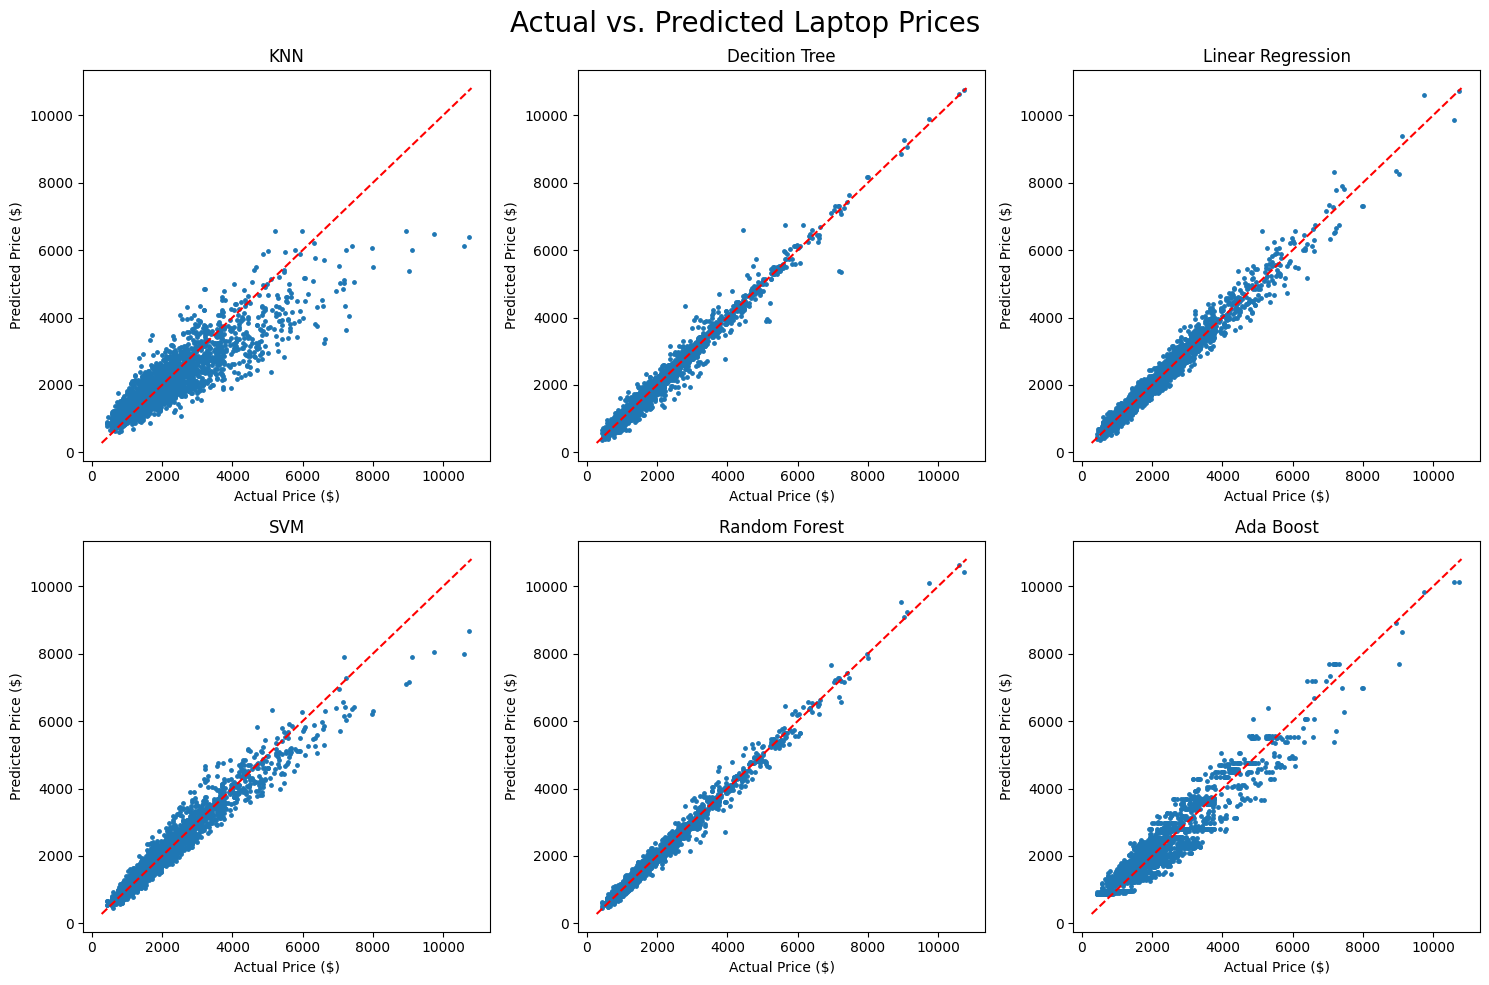

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.suptitle("Actual vs. Predicted Laptop Prices", fontsize=20)

axes[0, 0].scatter(x=ytest, y=ypred_knn,s=6)
axes[0, 0].set_xlabel("Actual Price ($)")
axes[0, 0].set_ylabel("Predicted Price ($)")
axes[0, 0].set_title("KNN")
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

axes[0, 1].scatter(x=ytest, y=ypred_dt,s=6)
axes[0, 1].set_xlabel("Actual Price ($)")
axes[0, 1].set_ylabel("Predicted Price ($)")
axes[0, 1].set_title("Decition Tree")
axes[0, 1].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

axes[0, 2].scatter(x=ytest, y=ypoly,s=6)
axes[0, 2].set_xlabel("Actual Price ($)")
axes[0, 2].set_ylabel("Predicted Price ($)")
axes[0, 2].set_title("Linear Regression")
axes[0, 2].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

axes[1, 0].scatter(x=ytest, y=ypred_svm,s=6)
axes[1, 0].set_xlabel("Actual Price ($)")
axes[1, 0].set_ylabel("Predicted Price ($)")
axes[1, 0].set_title("SVM")
axes[1, 0].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

axes[1, 1].scatter(x=ytest, y=ypred_rf,s=6)
axes[1, 1].set_xlabel("Actual Price ($)")
axes[1, 1].set_ylabel("Predicted Price ($)")
axes[1, 1].set_title("Random Forest")
axes[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

axes[1, 2].scatter(x=ytest, y=ypred_ad,s=6)
axes[1, 2].set_xlabel("Actual Price ($)")
axes[1, 2].set_ylabel("Predicted Price ($)")
axes[1, 2].set_title("Ada Boost")
axes[1, 2].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

plt.tight_layout()
plt.show()

## **pickle**

In [ ]:
import pickle
pickle.dump(rf,open('rfmodel.sav','wb'))

In [ ]:
pickle.dump(scaler,open('rfscaler.sav','wb'))

In [ ]:
pickle.dump(Brand_ohe,open('Brand.sav','wb'))
pickle.dump(Operating_System_ohe,open('Operating_System.sav','wb'))
pickle.dump(DataTransforme,open('DataTransformer.sav','wb'))